In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
data=pd.read_csv('Holiday_Package.csv')

In [3]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
data.shape

(872, 8)

In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


The dataset has 6 integer data types, and 2 object data types

In [8]:
# Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [9]:
# null value check
print('Number of Null value Rows = %d{}' .format(data.isna().sum()))

Number of Null value Rows = %dUnnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64


In [10]:
dfd=data.drop(['Unnamed: 0'],axis=1)
dfd.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

### Univariate Analysis

In [11]:
from scipy.stats import skew
for column in dfd.columns:
    if dfd[column].dtype != 'object':
        print('\n Skewness of',column,': ',skew(dfd[column]))


 Skewness of Salary :  3.097874889446042

 Skewness of age :  0.14616002999431685

 Skewness of educ :  -0.04542316723258808

 Skewness of no_young_children :  1.9431646149708026

 Skewness of no_older_children :  0.9523097178138935


Skewness assesses the extent to which a variable’s distribution is symmetrical. 
The skewness of no_older_children between 0.5 and 1, the data are moderately skewed.
The skewness of Salary, no_young_children is greater than 1, the data are highly skewed.

In [12]:
from scipy.stats import kurtosis
for column in dfd.columns:
    if dfd[column].dtype != 'object':
        print('\n Kurtosis of',column,': ',kurtosis(dfd[column]))


 Kurtosis of Salary :  15.754932655434068

 Kurtosis of age :  -0.9116254541773565

 Kurtosis of educ :  -0.0013468682635431328

 Kurtosis of no_young_children :  3.0852162364752944

 Kurtosis of no_older_children :  0.6652745356501817


Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center). Positive values (Salary, no_young_children) of kurtosis indicate that a distribution is peaked and possess thick tails. If the kurtosis is less than zero,(age, education) then the distribution is light tailed (x,z).

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


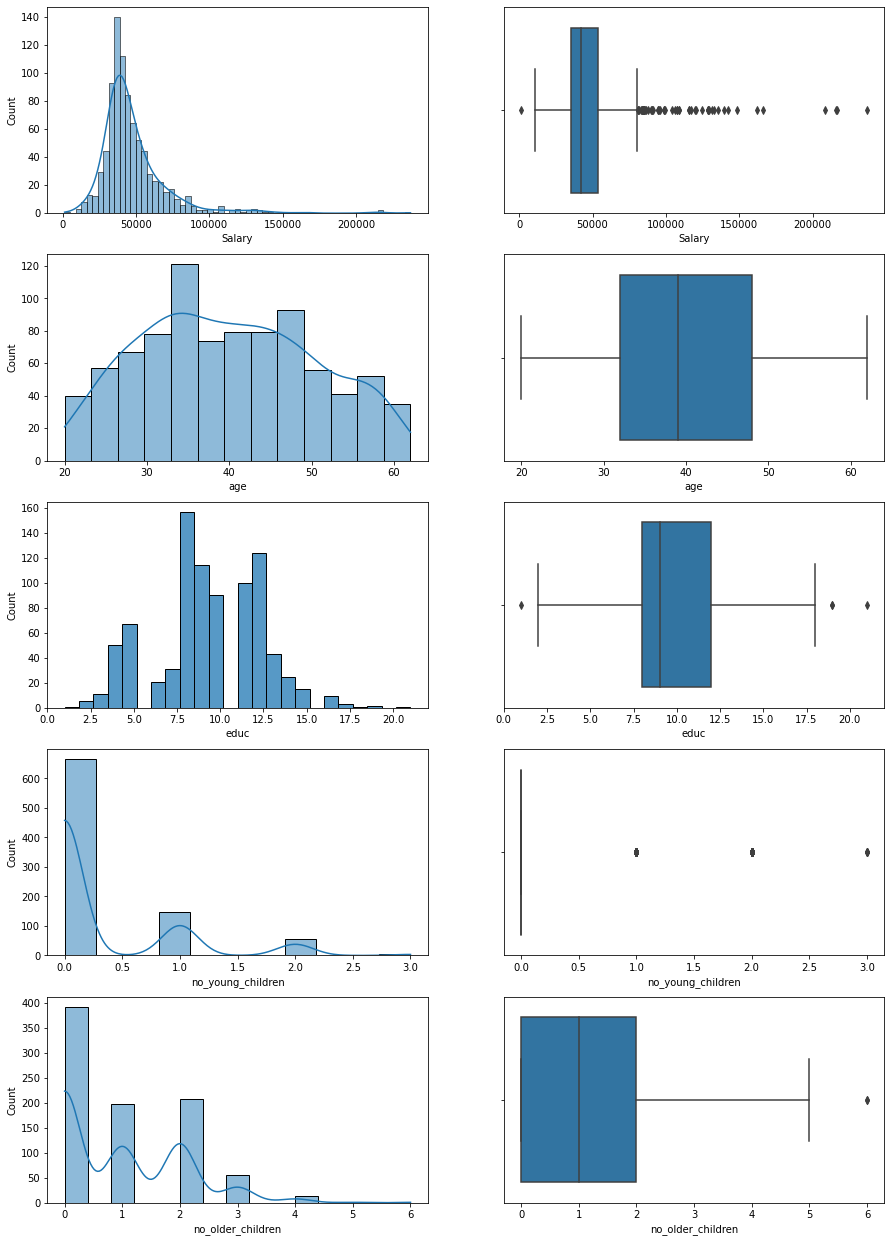

In [13]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,22)
sns.histplot(data['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x=data['Salary'],data=data,ax=axes[0][1])
sns.histplot(data['age'], kde=True, ax=axes[1][0])
sns.boxplot(x=data['age'],data=data,ax=axes[1][1])
sns.histplot(x=data['educ'],data=data,ax=axes[2][0])
sns.boxplot(data['educ'],data=data, ax=axes[2][1])
sns.histplot(x='no_young_children', data=data , kde=True,ax=axes[3][0])
sns.boxplot(data['no_young_children'],data=data, ax=axes[3][1])
sns.histplot(data['no_older_children'], kde=True, ax=axes[4][0])
sns.boxplot(data['no_older_children'],data=data, ax=axes[4][1])
plt.show()

'Salary' variable is almost a normal distribution skewed towards left. 

'Age' variable is normally distributed.

'Education', 'No_young_children', 'No_older_children' does not for a rgular band of continuos distribution.

All variables 'Salary', 'Education', 'No_young_children', 'No_older_children'except 'Age' has outliers present.


In [14]:
data["no_older_children"].value_counts(normalize=True)

0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
6    0.002294
5    0.002294
Name: no_older_children, dtype: float64

In [15]:
data['no_young_children'].value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

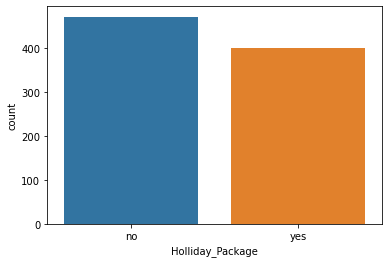

In [16]:
sns.countplot(x=data['Holliday_Package'])

<AxesSubplot:xlabel='foreign', ylabel='count'>

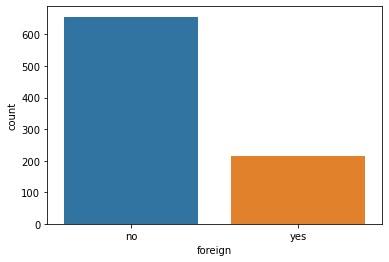

In [17]:
sns.countplot(x=data['foreign'])

In [18]:
data['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [19]:
data['foreign'].value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

### Inferences from Univariate Analysis

Amongst the group of people who have kids below age group of 7 years, 76% of the population have no kid followed by 16% with 1 kid and 6% with 2 kids. Only 0.5 % of people have 3 kids or more.

Amongst the group of people who have kids above the age group of 7 years, 45% of the population have no kid followed by 23% with 2 kids and 22% with 1 kid. 

Of the total population, 45% of the people have opted for Holiday package and 54% have not opted the package.

Of the total population, about 25% of the population are foreigners and the rest 75% are local

### Bivariate Analysis

<AxesSubplot:xlabel='educ', ylabel='count'>

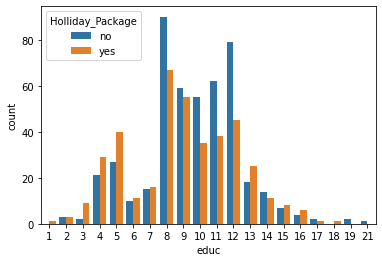

In [20]:
sns.countplot(x="educ", hue="Holliday_Package", data=data)

People with about 8, 9 years of formal education have opted for Holiday Package;

<AxesSubplot:xlabel='Salary', ylabel='Holliday_Package'>

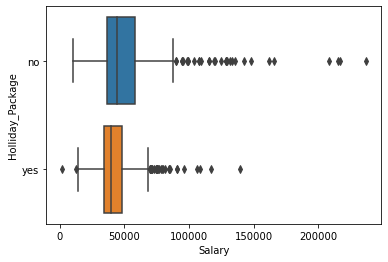

In [21]:
sns.boxplot(x=data['Salary'],y=data['Holliday_Package'])

Amongst the group of people who have Salary bands in the range of about 40,000 to 50,000 have opted for the Holiday package and generally people above the band of 50,000 has not opted the package though there are some exceptions to this statement. 

<AxesSubplot:xlabel='age', ylabel='Holliday_Package'>

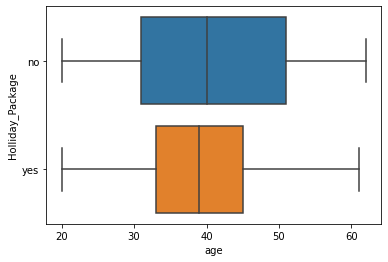

In [22]:
sns.boxplot(x=data['age'],y=data['Holliday_Package'])

People in the age group range of 35 years to 45 years have opted for Holiday Package. 

People above the age group of 45 years have not opted for Holiday Package though there are some exceptions to it. 

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

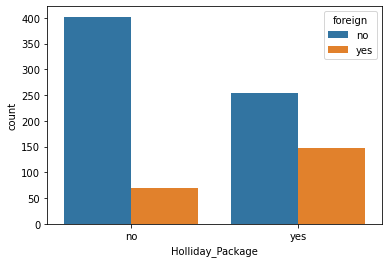

In [23]:
sns.countplot(x="Holliday_Package", hue="foreign", data=data)

Amongst the Foreigners population, the number of people who have opted of Holiday package is more than those who have not opted for it.

<AxesSubplot:xlabel='no_young_children', ylabel='count'>

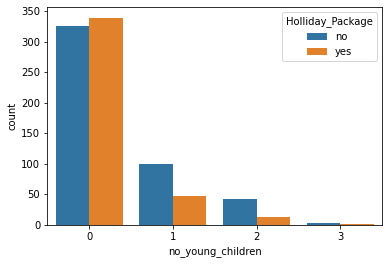

In [24]:
sns.countplot(x="no_young_children", hue="Holliday_Package", data=data)

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

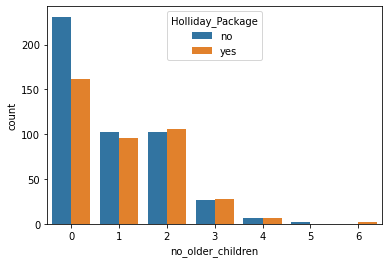

In [25]:
sns.countplot(x="no_older_children", hue="Holliday_Package", data=data)

People who have no young children (below the age group of 7 years) have opted the Holiday package followed by people with 1 kid and 2 kids. 

People who have no children (above the age group of 7 years) have opted the Holdiay package followed by 2 kids and 1 kid.

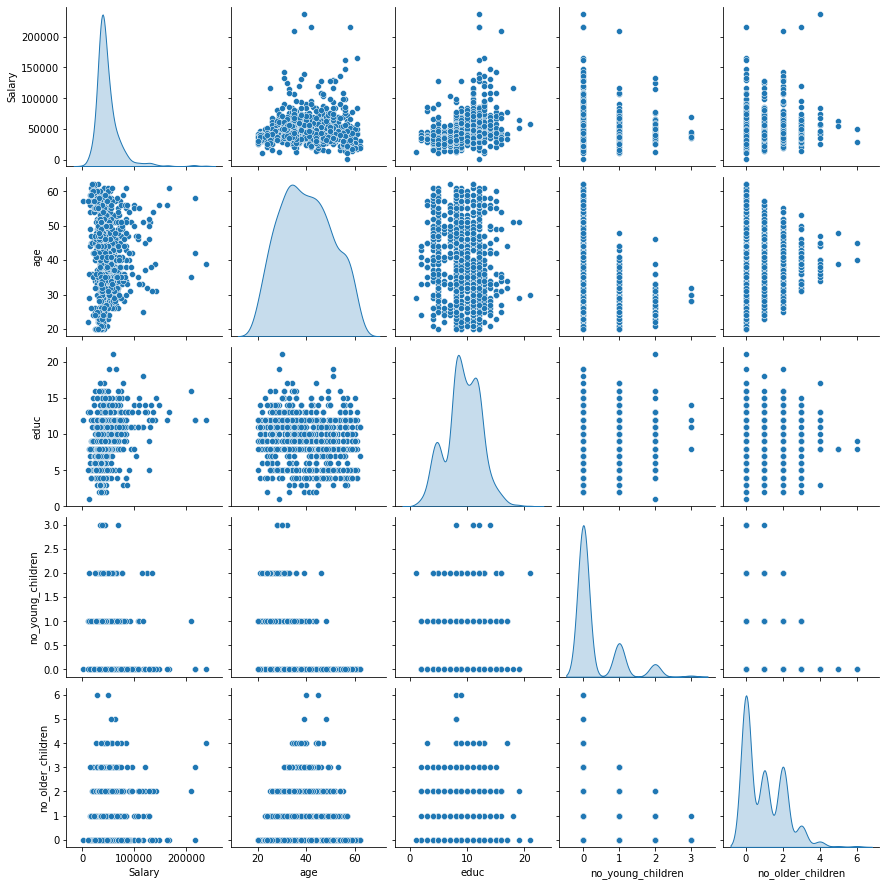

In [26]:
cont=dfd.dtypes[(data.dtypes!='object')].index
df_attr = (dfd[cont])
sns.pairplot(df_attr, diag_kind='kde',palette='bright',markers=all)  
plt.show()

In [27]:
data.corr()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,1.000000,-0.193249,-0.103782,-0.296015,0.052146,-0.025852
Salary,-0.193249,1.000000,0.071709,0.326540,-0.029664,0.113772
age,-0.103782,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,-0.296015,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,0.052146,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,-0.025852,0.113772,-0.116205,-0.036321,-0.238428,1.000000


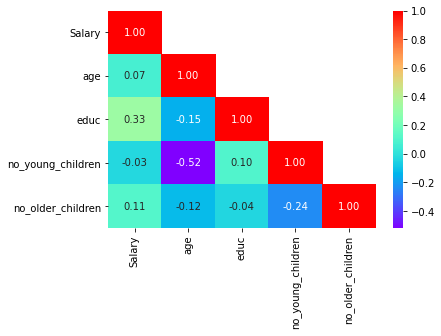

In [28]:
sns.heatmap(data[cont].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(data[cont].corr(),+1))
plt.show()

### Inferences from Bi-variate Analysis

None of the variables have co-relation with each other.

People with about 8, 9 years of formal education have opted for Holiday Package.

People who have no young children (below the age group of 7 years) have opted the Holiday package followed by people with 1 kid and 2 kids. 

People who have no children (above the age group of 7 years) have opted the Holdiay package followed by 2 kids and 1 kid.

Amongst the group of people who have Salary bands in the range of about 40,000 to 50,000 have opted for the Holdiate package and generally people above the band of 50,000 has not opted the package though there are some exceptions to this statement.

People in the age group range of 35 years to 45 years have opted for Holiday Package.

People above the age group of 45 years have not opted for Holiday Package though there are some exceptions to it.

### Distribution of the variables Check

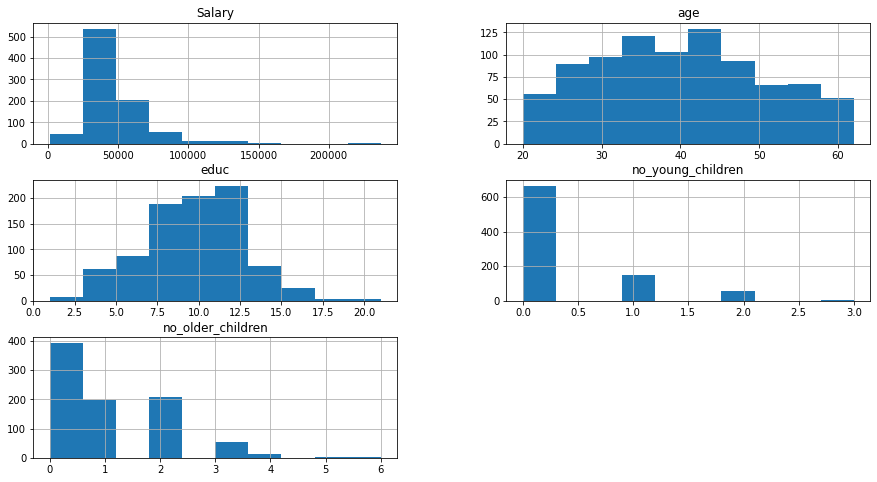

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
data[['Holliday_Package', 'Salary', 'age', 'educ','no_young_children', 'no_older_children', 'foreign']].hist();

### Box Plot with Outliers

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


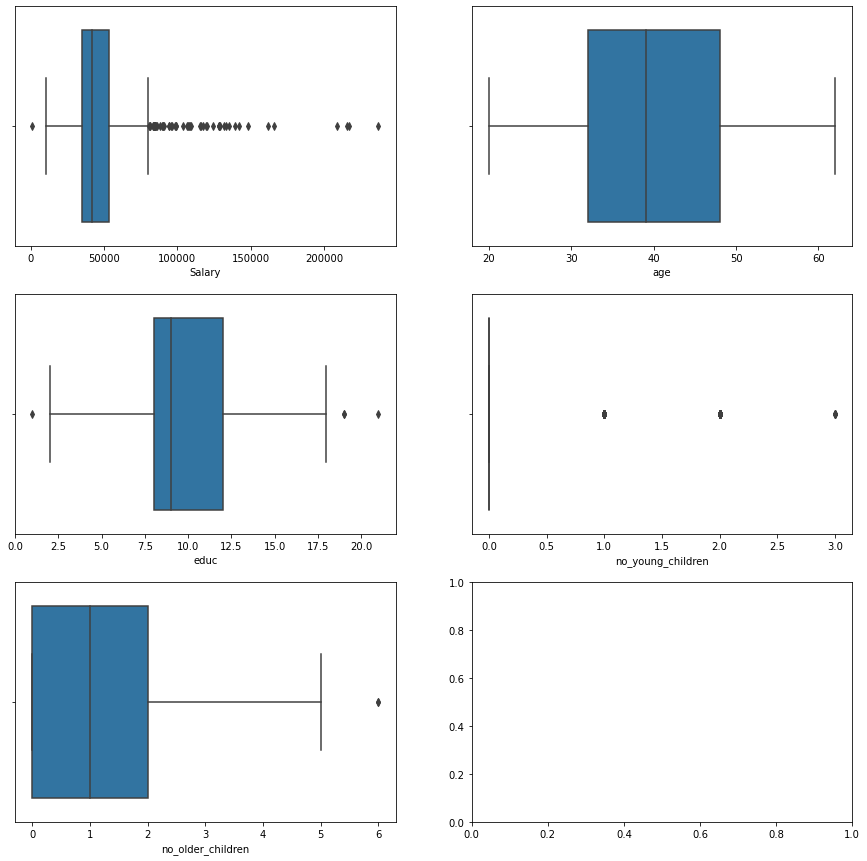

In [30]:
# construct box plot for continuous variables
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x=data['Salary'],data=data,ax=axes[0][0])
sns.boxplot(x=data['age'],data=data,ax=axes[0][1])
sns.boxplot(data['educ'],data=data,ax=axes[1][0])
sns.boxplot(data['no_young_children'],data=data,ax=axes[1][1])
sns.boxplot(data['no_older_children'],data=data,ax=axes[2][0])
plt.show()

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for column in data.columns:
    if data[column].dtype != 'object':
        lr,ur=remove_outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

### Box Plot without Outliers

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


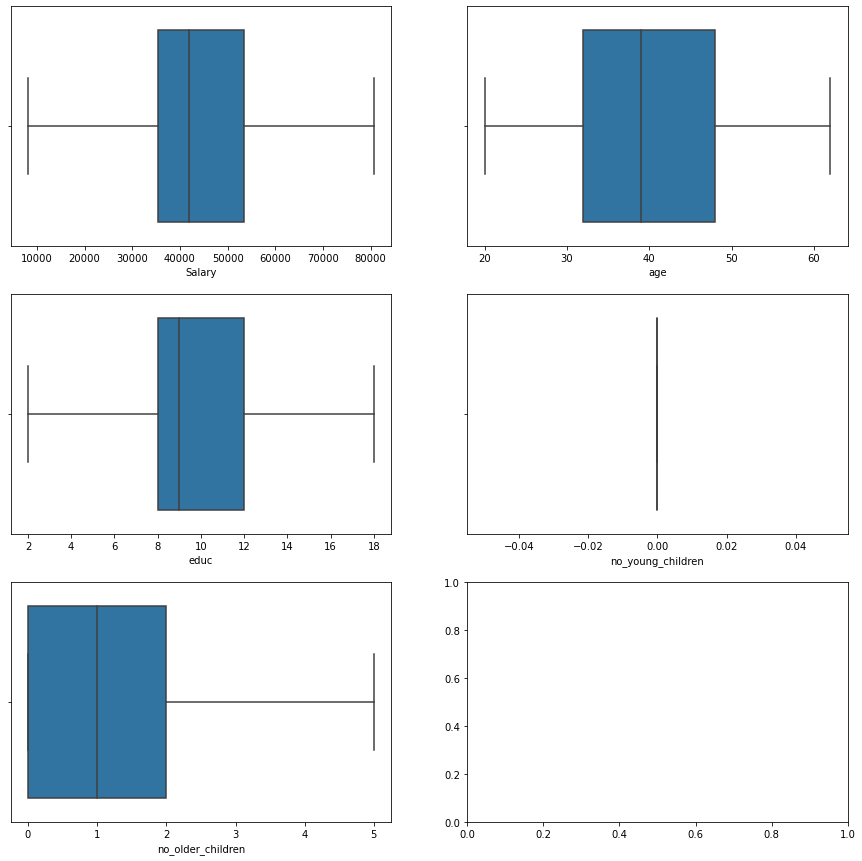

In [33]:
# construct box plot for continuous variables
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x=data['Salary'],data=data,ax=axes[0][0])
sns.boxplot(x=data['age'],data=data,ax=axes[0][1])
sns.boxplot(data['educ'],data=data,ax=axes[1][0])
sns.boxplot(data['no_young_children'],data=data,ax=axes[1][1])
sns.boxplot(data['no_older_children'],data=data,ax=axes[2][0])
plt.show()

### Geting unique counts of all Objects

In [34]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [35]:
## Converting the 'Holiday Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [36]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to people who have NOT opted for Holiday Package and 1 to people who have opted for Holiday Package

data['Holliday_Package'] = LE.fit_transform(data['Holliday_Package'])
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1.0,0,48412.0,30.0,8.0,0.0,1.0,no
1,2.0,1,37207.0,45.0,8.0,0.0,1.0,no
2,3.0,0,58022.0,46.0,9.0,0.0,0.0,no
3,4.0,0,66503.0,31.0,11.0,0.0,0.0,no
4,5.0,0,66734.0,44.0,12.0,0.0,2.0,no


### Converting categorical to dummy variables

In [37]:
data= pd.get_dummies(data,columns=['foreign'], drop_first=True)

In [38]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,1.0,0,48412.0,30.0,8.0,0.0,1.0,0
1,2.0,1,37207.0,45.0,8.0,0.0,1.0,0
2,3.0,0,58022.0,46.0,9.0,0.0,0.0,0
3,4.0,0,66503.0,31.0,11.0,0.0,0.0,0
4,5.0,0,66734.0,44.0,12.0,0.0,2.0,0


### Train Test Split

In [39]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = data[['Holliday_Package']]

In [40]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=data['Holliday_Package'])

In [41]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 7)
Number of rows and columns of the training set for the dependent variable: (610, 1)
Number of rows and columns of the test set for the independent variables: (262, 7)
Number of rows and columns of the test set for the dependent variable: (262, 1)


In [42]:
y_train.value_counts()

Holliday_Package
0                   329
1                   281
dtype: int64

In [43]:
y_test.value_counts()

Holliday_Package
0                   142
1                   120
dtype: int64

### Logistic Regression Model

In [44]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('\n Logistic Regression model score is {}'.format(model_score))
print('\n Confusion matrix of the Logistic Regression training data \n',metrics.confusion_matrix(y_train, ytrain_predict))
print('\n Confusion matrix of the Logistic Regression test data \n',metrics.confusion_matrix(y_test, ytest_predict))
print('\n Classification Report of the Logistic Regression model training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('\n Classification Report of the Logistic Regression model test data:\n\n',metrics.classification_report(y_test, ytest_predict),'\n')


 Logistic Regression model score is 0.6335877862595419

 Confusion matrix of the Logistic Regression training data 
 [[229 100]
 [137 144]]

 Confusion matrix of the Logistic Regression test data 
 [[104  38]
 [ 58  62]]

 Classification Report of the Logistic Regression model training data:

               precision    recall  f1-score   support

           0       0.63      0.70      0.66       329
           1       0.59      0.51      0.55       281

    accuracy                           0.61       610
   macro avg       0.61      0.60      0.60       610
weighted avg       0.61      0.61      0.61       610
 


 Classification Report of the Logistic Regression model test data:

               precision    recall  f1-score   support

           0       0.64      0.73      0.68       142
           1       0.62      0.52      0.56       120

    accuracy                           0.63       262
   macro avg       0.63      0.62      0.62       262
weighted avg       0.63      0.63

C:\Users\kpriyadh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Predicting on Training and Test dataset

In [45]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [46]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.604524,0.395476
1,0.567222,0.432778
2,0.483400,0.516600
3,0.666244,0.333756
4,0.618170,0.381830


### Model Evaluation

In [47]:
# Accuracy - Training Data
print('Logistic Regression Model Accuracy score of the Training data set {}'.format(model.score(X_train, y_train)))

Logistic Regression Model Accuracy score of the Training data set 0.6114754098360655


In [48]:
#Accuracy - Test Data
print('Logistic Regression Model Accuracy score of the Test data set {}'.format(model.score(X_test, y_test)))

Logistic Regression Model Accuracy score of the Test data set 0.6335877862595419


# AUC and ROC for the training data

AUC score of Training Data: 0.635


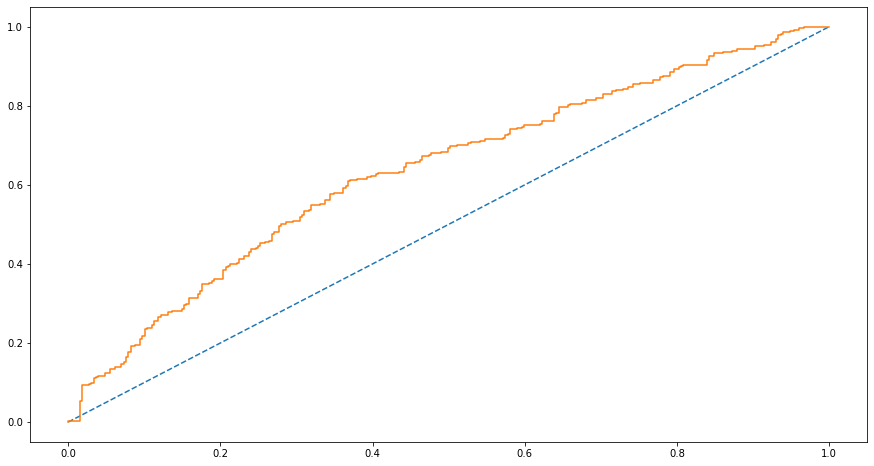

In [49]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC score of Training Data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC score of Test data: 0.635


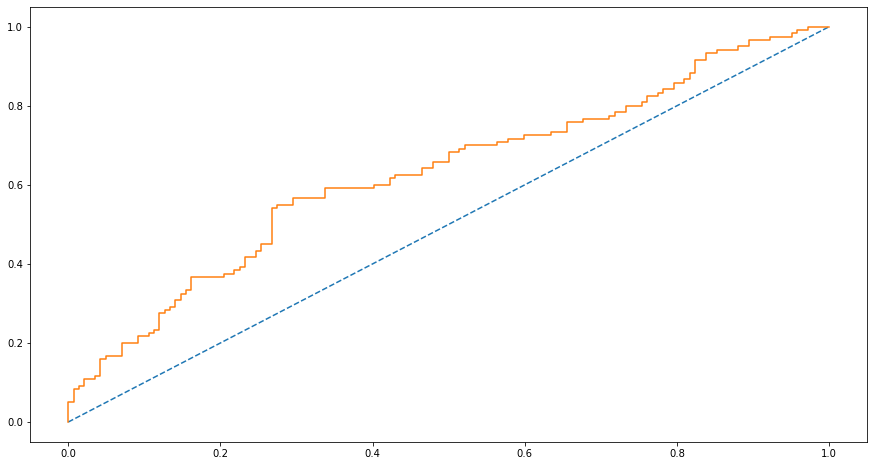

In [50]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC score of Test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC score of Training data and Test data is almost similar, hence it a good fit model. 

### Confusion Matrix for the training data

In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[229, 100],
       [137, 144]], dtype=int64)

Text(0.5, 1.0, 'Training data')

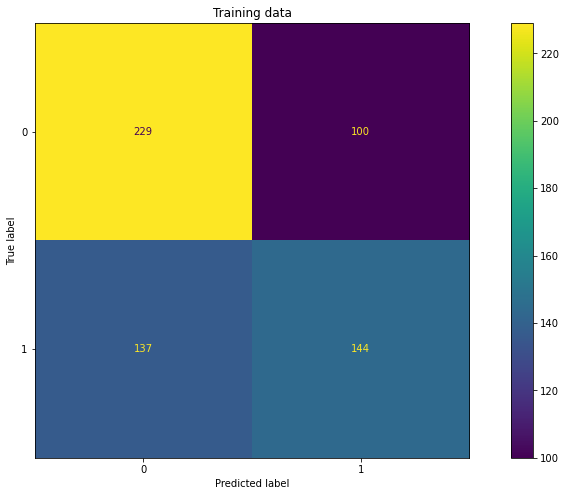

In [52]:
plot_confusion_matrix(model,X_train,y_train);
plt.title('Training data')

In [53]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       329
           1       0.59      0.51      0.55       281

    accuracy                           0.61       610
   macro avg       0.61      0.60      0.60       610
weighted avg       0.61      0.61      0.61       610



### Confusion Matrix for test data

In [54]:
confusion_matrix(y_test, ytest_predict)

array([[104,  38],
       [ 58,  62]], dtype=int64)

Text(0.5, 1.0, 'Test data')

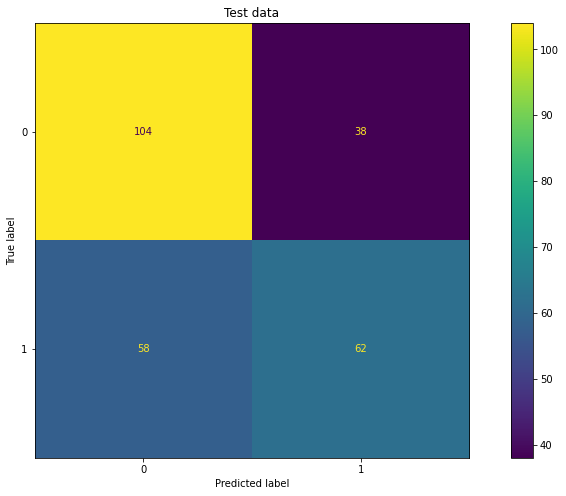

In [55]:
plot_confusion_matrix(model,X_test,y_test);
plt.title('Test data')

In [56]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       142
           1       0.62      0.52      0.56       120

    accuracy                           0.63       262
   macro avg       0.63      0.62      0.62       262
weighted avg       0.63      0.63      0.63       262



### Applying GridSearchCV for Logistic Regression

In [57]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [58]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [59]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [60]:
grid_search.fit(X_train, y_train)

C:\Users\kpriyadh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [61]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [62]:
best_model = grid_search.best_estimator_

In [63]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [64]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.528967,0.471033
1,0.597842,0.402158
2,0.418151,0.581849
3,0.624373,0.375627
4,0.630738,0.369262


              precision    recall  f1-score   support

           0       0.62      0.72      0.67       329
           1       0.60      0.48      0.53       281

    accuracy                           0.61       610
   macro avg       0.61      0.60      0.60       610
weighted avg       0.61      0.61      0.60       610
 



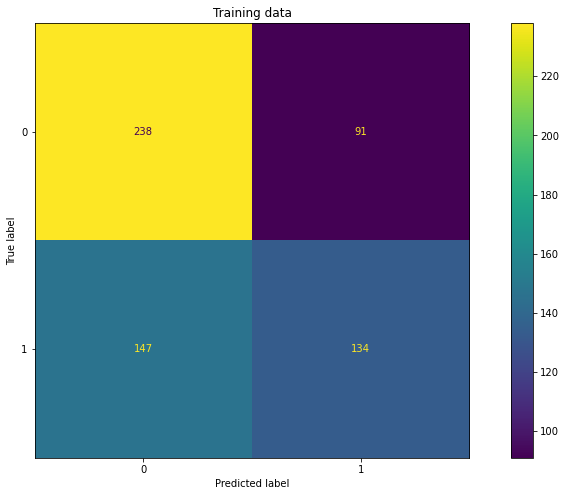

In [65]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
plt.title('Training data')
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       142
           1       0.60      0.50      0.55       120

    accuracy                           0.62       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.62      0.62      0.61       262
 



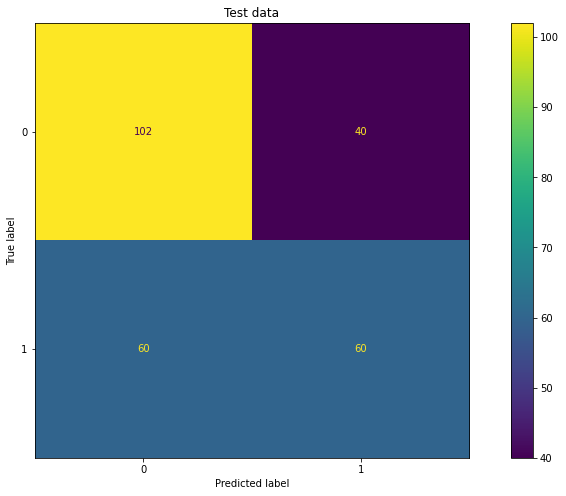

In [66]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
plt.title('Test data')
print(classification_report(y_test, ytest_predict),'\n');    

### LDA Model

In [67]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\kpriyadh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

#### Training Data and Test Data Confusion Matrix Comparison

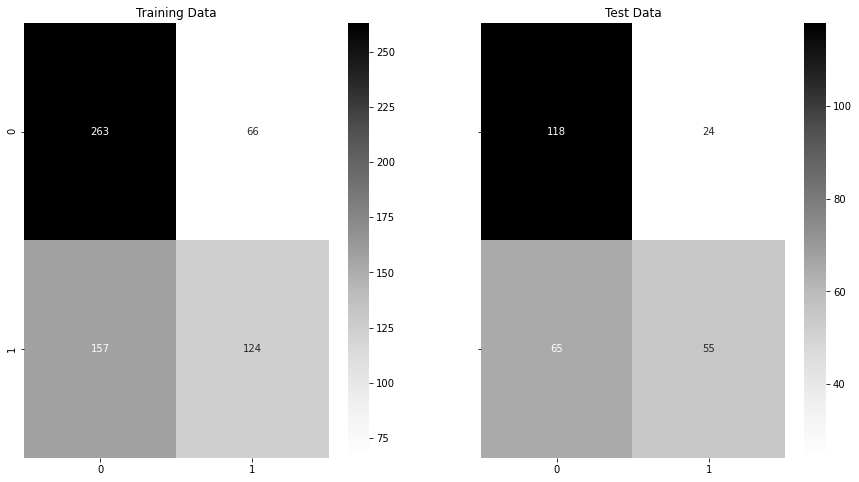

In [69]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


#### Training Data and Test Data Classification Report Comparison

In [70]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.80      0.70       329
           1       0.65      0.44      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262
 



#### Probability prediction for the training and test data

In [71]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [72]:
pred_prob_train[:,1]

array([0.73548628, 0.64854003, 0.45381299, 0.67999189, 0.6686718 ,
       0.37694952, 0.32092975, 0.42972112, 0.35833707, 0.6232618 ,
       0.2334206 , 0.25734687, 0.44392401, 0.47950868, 0.29776713,
       0.46733326, 0.43445808, 0.3005658 , 0.54231815, 0.6650217 ,
       0.49664776, 0.31447391, 0.75293811, 0.437304  , 0.31646943,
       0.74821632, 0.25030982, 0.72496108, 0.49244094, 0.46735032,
       0.24239768, 0.60132045, 0.38831447, 0.38779521, 0.34507315,
       0.35722709, 0.47767192, 0.50179896, 0.47324898, 0.21318725,
       0.22443329, 0.67074791, 0.39843159, 0.62311998, 0.6495083 ,
       0.34101591, 0.33750216, 0.73477758, 0.41430926, 0.6237371 ,
       0.57784693, 0.40197024, 0.4974871 , 0.4091262 , 0.22115348,
       0.41638291, 0.2584978 , 0.53329543, 0.66558985, 0.41449349,
       0.59737672, 0.26249074, 0.43080546, 0.34664681, 0.51025932,
       0.53951902, 0.41813364, 0.50330706, 0.4110365 , 0.33389254,
       0.25658647, 0.66162785, 0.48839567, 0.25977263, 0.71615

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


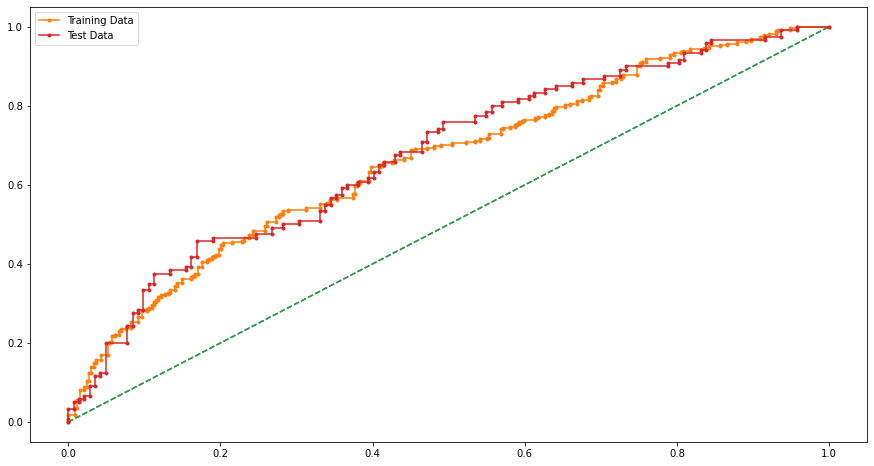

In [73]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


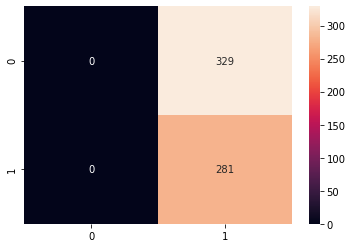

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


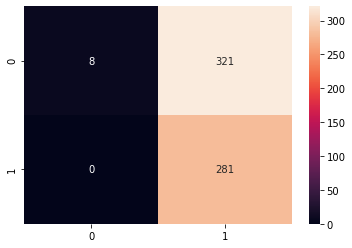

0.3 

Accuracy Score 0.5361
F1 Score 0.6502 

Confusion Matrix


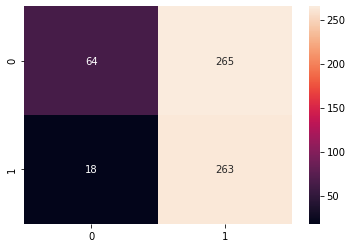

0.4 

Accuracy Score 0.582
F1 Score 0.6095 

Confusion Matrix


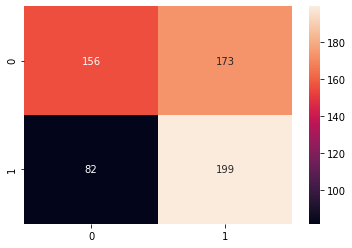

0.5 

Accuracy Score 0.6344
F1 Score 0.5265 

Confusion Matrix


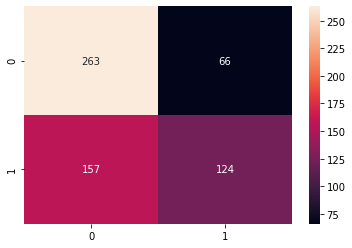

0.6 

Accuracy Score 0.6197
F1 Score 0.445 

Confusion Matrix


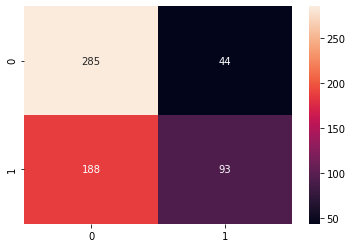

0.7 

Accuracy Score 0.5885
F1 Score 0.2507 

Confusion Matrix


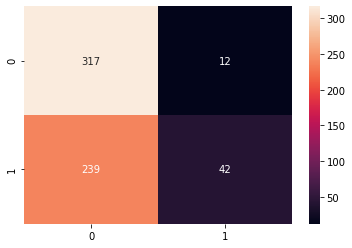

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


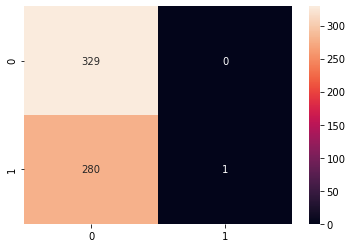

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


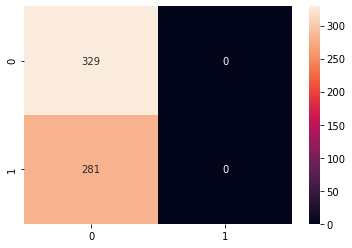

In [74]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We take cut off value as 0.3 as it has the maximum F1 score

In [75]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

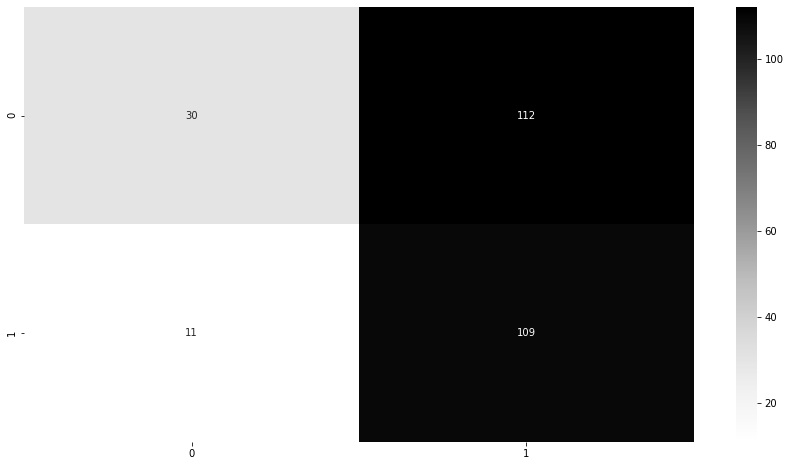

In [76]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [77]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.73      0.21      0.33       142
           1       0.49      0.91      0.64       120

    accuracy                           0.53       262
   macro avg       0.61      0.56      0.48       262
weighted avg       0.62      0.53      0.47       262
 



In [78]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Class=model.fit(X_train, y_train)

C:\Users\kpriyadh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


In [79]:
print(Class.coef_, Class.intercept_)

[[-8.51719917e-05 -1.92038239e-05 -1.44599906e-02  4.98279814e-02
   0.00000000e+00  1.96884560e-01  1.13652931e+00]] [0.37355537]


Unnamed: 0 -> -8.51719917e-05
salary -> -1.92038239e-05
age -> -1.44599906e-02
educ -> 4.98279814e-02
no_young_children ->  0.00000000e+00
no_older_children -> 1.96884560e-01
foreign_yes -> 1.13652931e+00

The important factors, the company should focus on employees to sell their packages is as follows:

•	Amongst the total foreigner population more persons have opted for the holiday package, so immediate target customer / first preference for selling holiday packages goes to Foreigner group, also as the co-efficient for foreigner_yes group is positive. 

•	Next group of focus customers are those who have no kids, special offers / discount coupons to holiday packages can be given to the ‘Couple’ only group to attract more revenue. 

•	Next group is employees who have kids in the age group of above 7 years also shares a pie. Employees with 2 kids are greater in population than with 1 kid, so special arrangements for kids can be made by the travel agency like ‘free combo cots’, ‘kids play area’ coupons etc. 

•	Age of the employee must be prioritized next post which education and salary forms the precedence. 
